In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X1 = mnist['data']
Y = mnist['target']
tudo = np.concatenate((X1, Y.reshape(70000,1)), axis=1)
tudo_5 = tudo[tudo[:,-1]=='5']
X_5 = tudo_5[:,0:-1]
X_5 = X_5.astype('float64')

In [3]:
t_max = 1000

In [4]:
def em(X, t_max=t_max, L=2, var=1):
    I = np.eye(L)
    W = np.random.rand(X.shape[1], L)
    mean = np.mean(X_5, axis=0).reshape(1,-1)
    X = X - mean

    for t in range(t_max):

        #Expectation
        M = W.T @ W + var * I
        Minv = np.linalg.inv(M)
        Ez = X @ W @ Minv
        Ezz = var * Minv + Ez[:, :, None] * Ez[:, None, :]

        #Maximization

        W_new = X.T @ Ez @ np.linalg.inv(np.sum(Ezz, axis=0))
        var = np.mean(
                    np.mean((X) ** 2, axis=1)
                    - 2 * np.mean(Ez @ W.T * (X), axis=1)
                    + np.trace((Ezz @ W.T @ W).T) / np.size(X_5, 1))
        #if t%10 == 0:
            #print(W.sum())
        if np.allclose(W,W_new):
            print('Break at t: ' + str(t))
            break
        W = W_new
    Z = np.linalg.solve(M, (X @ W).T).T
    X_ = Z @ W.T + mean
        
    return {'M':M, 'W':W, 'var':var, 'Z':Z,"X_":X_,'Minv':Minv}

In [5]:
r2 = em(X_5)
r10 = em(X_5,L=10)
r50 = em(X_5,L=50)

Break at t: 817


In [9]:
def generate(X,L,r,size):
    size= size
    L = L
    mean = np.mean(X, axis=0).reshape(1,-1)
    X = X - mean
    generateZ = np.random.multivariate_normal(r['Z'].sum(axis=0), r['var'] * r['Minv'],size = size)
    return generateZ @ r['W'].T + mean
   

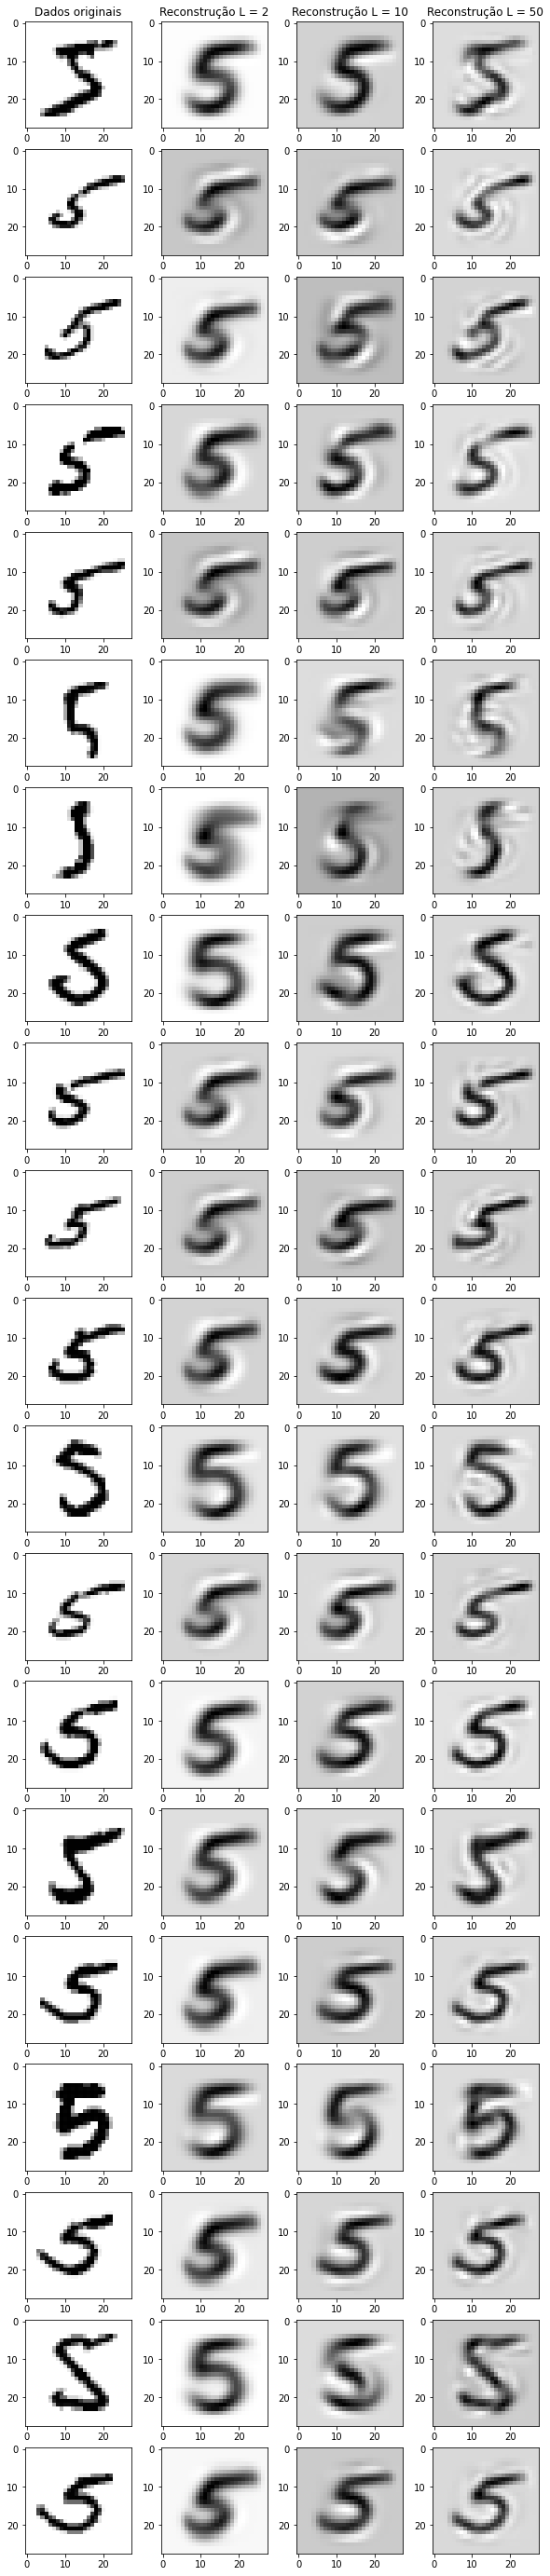

In [20]:
fig, ax = plt.subplots(20,4, figsize=(10, 50))
ax[0][0].set_title('Dados originais')
ax[0][1].set_title('Reconstrução L = 2')
ax[0][2].set_title('Reconstrução L = 10')
ax[0][3].set_title('Reconstrução L = 50')
for i in range(20):
    a = X_5[i].reshape(28,28)
    b = r2['X_'][i].reshape(28,28)
    c = r10['X_'][i].reshape(28,28)
    d = r50['X_'][i].reshape(28,28)
    ax[i][0].imshow(a,cmap=mpl.cm.binary,interpolation='nearest')
    ax[i][1].imshow(b,cmap=mpl.cm.binary,interpolation='nearest')
    ax[i][2].imshow(c,cmap=mpl.cm.binary,interpolation='nearest')
    ax[i][3].imshow(d,cmap=mpl.cm.binary,interpolation='nearest')
plt.savefig('Reconstrucao L={2,10,50}')  

<h3> Para esta tarefa de Reconstrução percebe-se claramente que ao aumentar a quantidade de dimensões L de Z melhor será a reconstrução, as reconstruções com L = 50 conseguem reproduzir mais detalhes e nuances de cada numero original <h3>

In [10]:
g2 = generate(X_5,2,r2,20)
g10 = generate(X_5,10,r10,20)
g50 = g2 = generate(X_5,50,r50,20)

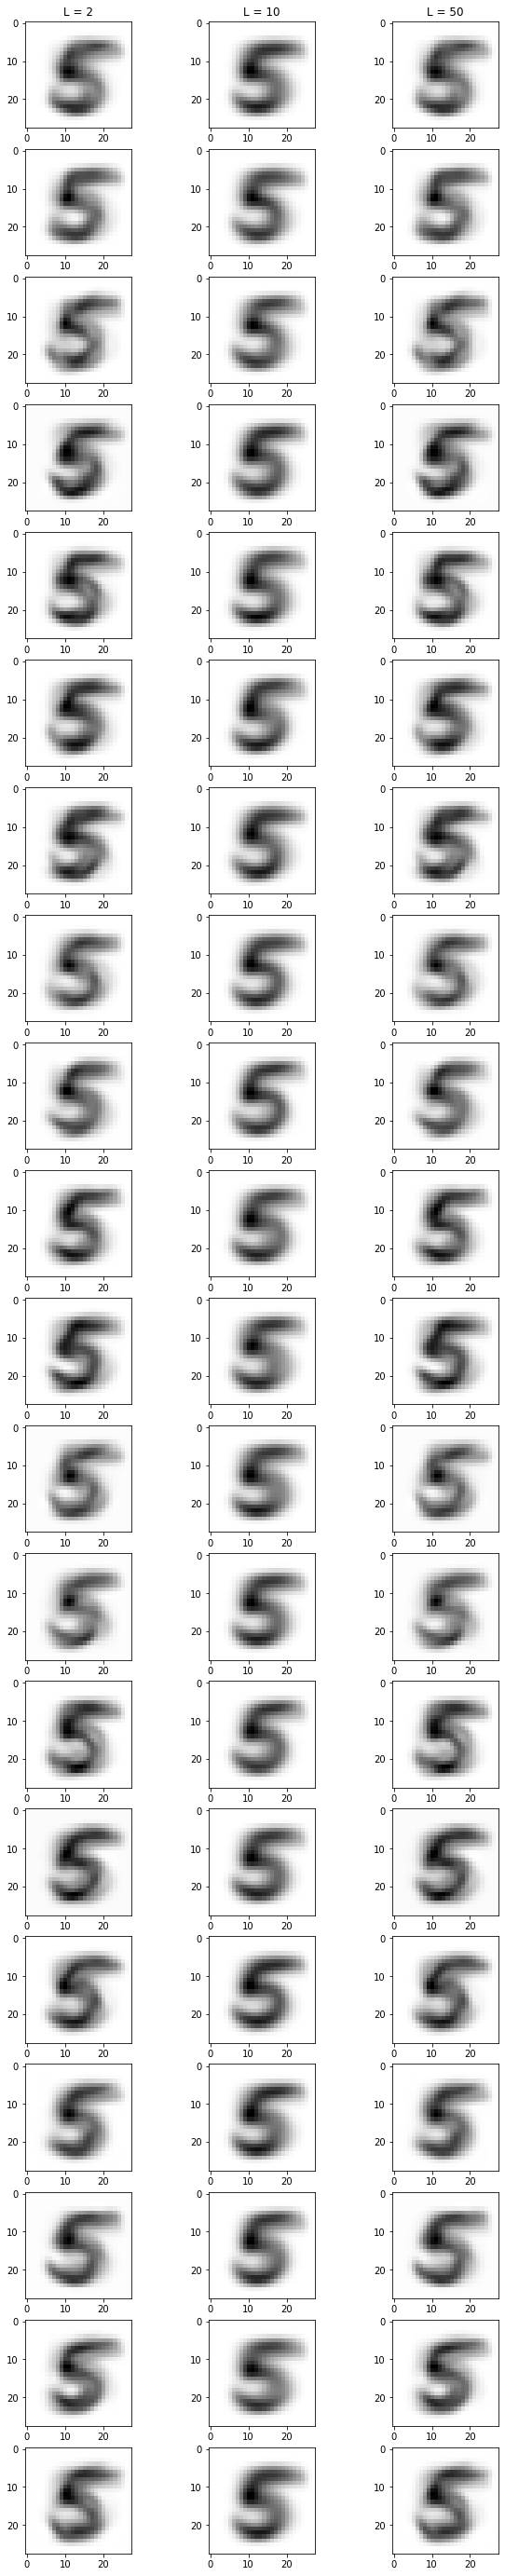

In [19]:
fig, ax = plt.subplots(20,3, figsize=(10, 50))
ax[0][0].set_title('L = 2')
ax[0][1].set_title('L = 10')
ax[0][2].set_title('L = 50')
for i in range(20):
    a = g2[i].reshape(28,28)
    b = g10[i].reshape(28,28)
    c = g50[i].reshape(28,28)
    ax[i][0].imshow(a,cmap=mpl.cm.binary,interpolation='nearest')
    ax[i][1].imshow(b,cmap=mpl.cm.binary,interpolation='nearest')
    ax[i][2].imshow(c,cmap=mpl.cm.binary,interpolation='nearest')
plt.savefig('GERAÇÃO DE NUMERO L={2,10,50}')    

Para esta tarefa de Geração de novas amostras o aumento de L não implica em melhores amostras.